### Step 1 - Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import warnings
warnings.filterwarnings("ignore")

### Step 2 - Load Dataset

In [2]:
iris = pd.read_csv("Iris.csv",index_col=None)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# prompt: iris.drop("ID")

iris.drop("Id", axis=1, inplace=True)


### Step 3 - Perform EDA

In [4]:
# get top 5 rows

iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# get shape of dataset in rows and column format

iris.shape

(150, 5)

In [6]:
# get columns names present in dataset

iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
# get information about dataset

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# get count of null values in dataset

iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# get value counts and dtype of different iris species

iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Scatter Plot

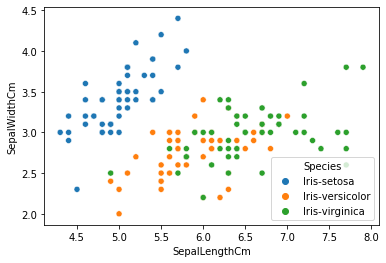

In [10]:
sns.scatterplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

#### Joint Plot

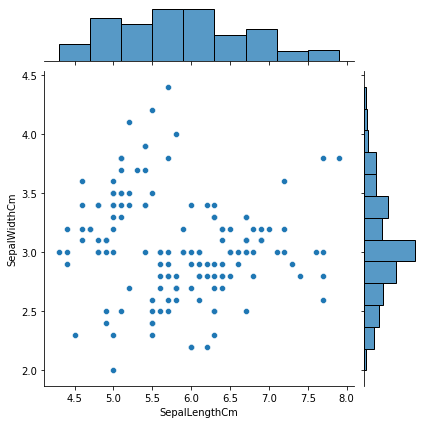

In [11]:
sns.jointplot(data=iris, x="SepalLengthCm", y="SepalWidthCm")

#### Box Plot

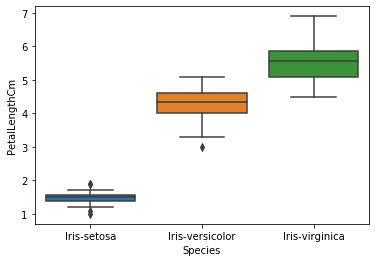

In [12]:
sns.boxplot(data=iris, x="Species", y="PetalLengthCm")

#### Pair Plot

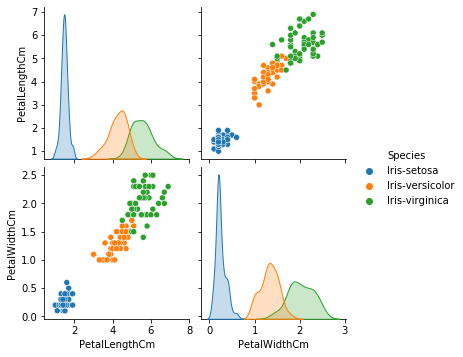

In [13]:
sns.pairplot(data=iris, vars=[ "PetalLengthCm", "PetalWidthCm"], hue="Species")

#### Bar Plot

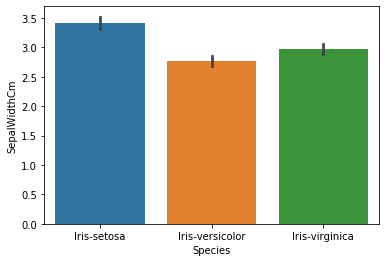

In [14]:
sns.barplot(data=iris, x="Species", y="SepalWidthCm")

#### Swarm Plot

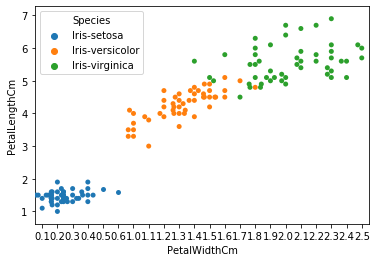

In [15]:
sns.swarmplot(data=iris, x='PetalWidthCm',y='PetalLengthCm', hue = 'Species')

# splitting data into x and y

In [16]:
X = iris.values[:, 0:-1]
y = iris.values[:,-1]

In [17]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
encoder= LabelEncoder()

encoded_y=encoder.fit_transform(y)

In [19]:
encoded_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Spliting Data Into train test


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y,
                                                    test_size=0.3,
                                                    random_state=24)


In [21]:
print("Train Size: ", X_train.shape, y_train.shape)
print("Test Size: ", X_test.shape, y_test.shape)

Train Size:  (105, 4) (105,)
Test Size:  (45, 4) (45,)


# Runnig Basic model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:

#create a model
classifier=LogisticRegression()

#fitting training data to the model
classifier.fit(X_train, y_train)

LogisticRegression()

In [24]:
#predict using the model
y_pred=classifier.predict(X_test)

In [25]:
accuracy =(accuracy_score(y_test, y_pred)*100)
print("acuracy of model is",accuracy,"%")

acuracy of model is 97.77777777777777 %


In [26]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)
print()


print("Classification report: ")

print(classification_report(y_test,y_pred))

accuracy_score=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",accuracy_score)

[[15  0  0]
 [ 0 11  1]
 [ 0  0 18]]

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.92      0.96        12
           2       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy of the model:  0.9777777777777777


In [30]:
import gradio as gr
from sklearn.linear_model import LogisticRegression

# Assuming you have your training data (X_train, y_train)

# Train a Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


# Define the prediction function
def predict(sepal_length, sepal_width, petal_length, petal_width):
  """Predicts the Iris species based on sepal and petal measurements.

  Args:
      sepal_length (float): Sepal length of the flower.
      sepal_width (float): Sepal width of the flower.
      petal_length (float): Petal length of the flower.
      petal_width (float): Petal width of the flower.

  Returns:
      str: The predicted Iris species (Setosa, Versicolor, Virginica) or an error message.
  """

  try:
    # Prepare the input data
    new_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Make prediction
    prediction = classifier.predict(new_data)[0]

    # Get the Iris species name based on the predicted class
    iris_species = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}[prediction]

    return iris_species
  except Exception as e:
    return f"Error: {str(e)}"  # Return a user-friendly error message

# Define the Gradio interface with improved layout and error handling
interface = gr.Interface(
  fn=predict,
  inputs=[
    gr.Slider(0.0, 8.0, label="Sepal Length (cm)"),
    gr.Slider(0.0, 4.5, label="Sepal Width (cm)"),
    gr.Slider(0.0, 6.5, label="Petal Length (cm)"),
    gr.Slider(0.0, 2.0, label="Petal Width (cm)"),
  ],
  outputs="text",
  title="Iris Flower Species Prediction",
  description="Predict the Iris species (Setosa, Versicolor, Virginica) based on its sepal and petal measurements. Use the sliders to adjust the values.",
  # Prevent accidental interface flagging by users
  examples=[
    [5.1, 3.5, 1.4, 0.2],  # Iris-setosa example
    [6.3, 2.8, 5.1, 1.5],  # Iris-virginica example
  ]
)

# Launch the Gradio interface
interface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
